<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.179104,28.089795,67.476438,-0.004967,152.740370,152.744127,-0.003758
1,0.0,1.0,41.953681,52.692717,63.806520,-0.004828,168.448090,168.451827,-0.003737
2,0.0,2.0,73.046270,73.930006,74.993139,0.000607,231.970023,231.970100,-0.000078
3,0.0,3.0,94.938494,45.039278,41.569622,0.004554,191.551949,191.546108,0.005840
4,0.0,4.0,58.538598,31.608458,76.844386,0.003492,176.994933,176.991112,0.003822
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.862381,26.521459,91.080378,0.031319,190.495536,190.469589,0.025948
29996,999.0,26.0,70.656060,69.333704,46.016237,0.001087,196.007089,196.003324,0.003764
29997,999.0,27.0,43.793845,52.662635,43.490411,0.000894,149.947786,149.946023,0.001763
29998,999.0,28.0,53.055546,28.680883,65.410998,-0.000063,157.147364,157.150714,-0.003350


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.179104  28.089795  67.476438 -0.004967  152.740370   
      1.0    41.953681  52.692717  63.806520 -0.004828  168.448090   
      2.0    73.046270  73.930006  74.993139  0.000607  231.970023   
      3.0    94.938494  45.039278  41.569622  0.004554  191.551949   
      4.0    58.538598  31.608458  76.844386  0.003492  176.994933   
...                ...        ...        ...       ...         ...   
999.0 25.0   62.862381  26.521459  91.080378  0.031319  190.495536   
      26.0   70.656060  69.333704  46.016237  0.001087  196.007089   
      27.0   43.793845  52.662635  43.490411  0.000894  149.947786   
      28.0   53.055546  28.680883  65.410998 -0.000063  157.147364   
      29.0   30.036290  87.901609  59.769576  0.003844  187.711319   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    152.744127 -0.003758  
      1.0    168.451827 -0.003737  
      2.0    231.970100 -0.000078  
      3.0    191.546108  0.005840  
      4.0    176.991112  0.003822  
...                 ...       ...  
999.0 25.0   190.469589  0.025948  
      26.0   196.003324  0.003764  
      27.0   149.946023  0.001763  
      28.0   157.150714 -0.003350  
      29.0   187.704136  0.007182  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.179104  28.089795  67.476438 -0.004967  152.740370   
      1.0    41.953681  52.692717  63.806520 -0.004828  168.448090   
      2.0    73.046270  73.930006  74.993139  0.000607  231.970023   
      3.0    94.938494  45.039278  41.569622  0.004554  191.551949   
      4.0    58.538598  31.608458  76.844386  0.003492  176.994933   
...                ...        ...        ...       ...         ...   
999.0 25.0   62.862381  26.521459  91.080378  0.031319  190.495536   
      26.0   70.656060  69.333704  46.016237  0.001087  196.007089   
      27.0   43.793845  52.662635  43.490411  0.000894  149.947786   
      28.0   53.055546  28.680883  65.410998 -0.000063  157.147364   
      29.0   30.036290  87.901609  59.769576  0.003844  187.711319   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    152.744127 -0.003758  
      1.0    168.451827 -0.003737  
      2.0    231.970100 -0.000078  
      3.0    191.546108  0.005840  
      4.0    176.991112  0.003822  
...                 ...       ...  
999.0 25.0   190.469589  0.025948  
      26.0   196.003324  0.003764  
      27.0   149.946023  0.001763  
      28.0   157.150714 -0.003350  
      29.0   187.704136  0.007182  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.179104,28.089795,67.476438,-0.004967,152.740370,152.744127,-0.003758
1,0.0,1.0,41.953681,52.692717,63.806520,-0.004828,168.448090,168.451827,-0.003737
2,0.0,2.0,73.046270,73.930006,74.993139,0.000607,231.970023,231.970100,-0.000078
3,0.0,3.0,94.938494,45.039278,41.569622,0.004554,191.551949,191.546108,0.005840
4,0.0,4.0,58.538598,31.608458,76.844386,0.003492,176.994933,176.991112,0.003822
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.862381,26.521459,91.080378,0.031319,190.495536,190.469589,0.025948
29996,999.0,26.0,70.656060,69.333704,46.016237,0.001087,196.007089,196.003324,0.003764
29997,999.0,27.0,43.793845,52.662635,43.490411,0.000894,149.947786,149.946023,0.001763
29998,999.0,28.0,53.055546,28.680883,65.410998,-0.000063,157.147364,157.150714,-0.003350


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.179104  28.089795  67.476438 -0.004967  152.740370   
      1.0    41.953681  52.692717  63.806520 -0.004828  168.448090   
      2.0    73.046270  73.930006  74.993139  0.000607  231.970023   
      3.0    94.938494  45.039278  41.569622  0.004554  191.551949   
      4.0    58.538598  31.608458  76.844386  0.003492  176.994933   
...                ...        ...        ...       ...         ...   
999.0 25.0   62.862381  26.521459  91.080378  0.031319  190.495536   
      26.0   70.656060  69.333704  46.016237  0.001087  196.007089   
      27.0   43.793845  52.662635  43.490411  0.000894  149.947786   
      28.0   53.055546  28.680883  65.410998 -0.000063  157.147364   
      29.0   30.036290  87.901609  59.769576  0.003844  187.711319   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    152.744127 -0.003758  
      1.0    168.451827 -0.003737  
      2.0    231.970100 -0.000078  
      3.0    191.546108  0.005840  
      4.0    176.991112  0.003822  
...                 ...       ...  
999.0 25.0   190.469589  0.025948  
      26.0   196.003324  0.003764  
      27.0   149.946023  0.001763  
      28.0   157.150714 -0.003350  
      29.0   187.704136  0.007182  

[30000 rows x 7 columns]

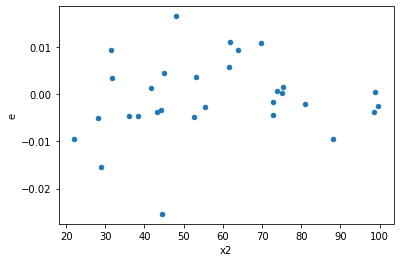

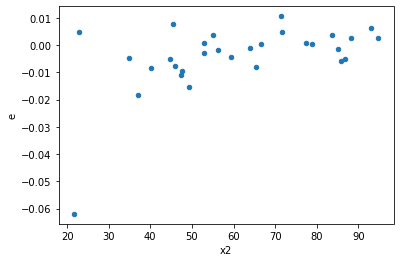

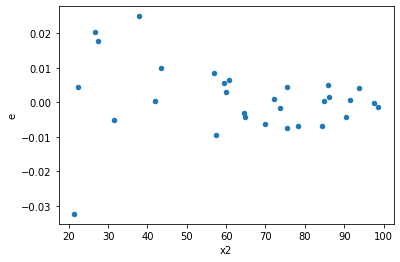

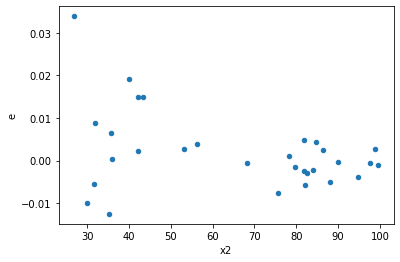

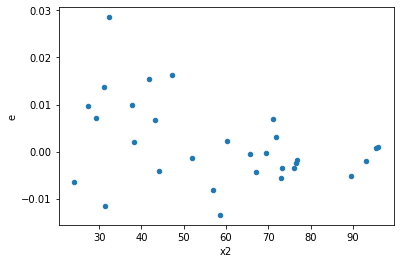

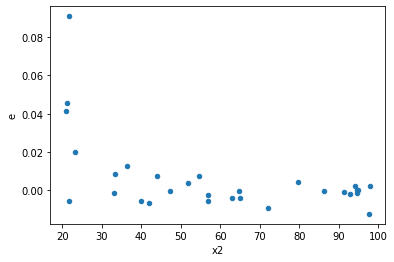

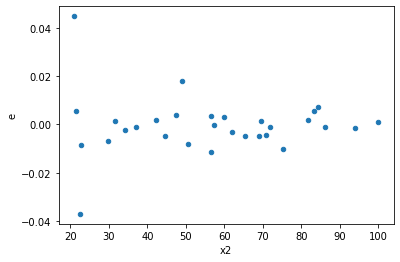

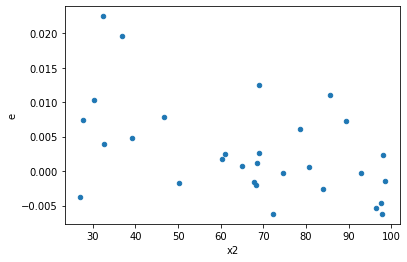

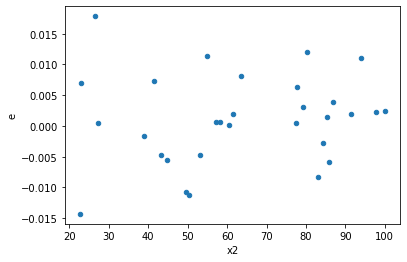

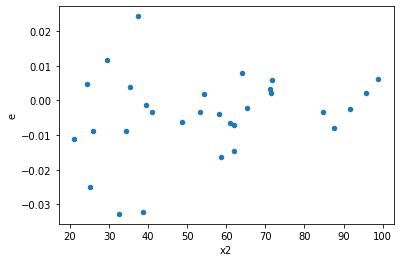

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,20.0,4.0,0.0008267691631515204,0.0005994948963159292,4.133845815757602e-05,0.0001498737240789823,3.625527674682159,0.2197840733666263,0.8901079633166868,0.10989203668331315,Reject001=1 : Homoscedasticity
3.0,13.0,11.0,0.00012031673592862477,0.0014004746234026642,9.255133532971136e-06,0.00012731587485478765,13.756243970033351,0.00011498716905089523,0.9999425064154746,5.7493584525447616e-05,Reject001=0 : Heteroscedasticity
4.0,18.0,6.0,0.0007296225420431688,0.0005518073218521873,4.053458566906493e-05,9.196788697536456e-05,2.268874479838395,0.3160343558461247,0.8419828220769376,0.15801717792306236,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.00017982903997836087,0.006665568995769572,1.7982903997836086e-05,0.000476112071126398,26.475816763726783,4.444946171133779e-07,0.9999997777526914,2.2224730855668895e-07,Reject001=0 : Heteroscedasticity
6.0,17.0,7.0,0.0007051831518284592,0.003353131680454775,4.1481361872262304e-05,0.0004790188114935393,11.547808217305635,0.003024283286562346,0.9984878583567188,0.001512141643281173,Reject001=0 : Heteroscedasticity
7.0,10.0,14.0,0.00016278022691110003,0.0005049879215569984,1.6278022691110003e-05,3.607056582549988e-05,2.2159058572389925,0.16892056928618526,0.9155397153569074,0.08446028464309263,Reject001=1 : Homoscedasticity
10.0,9.0,15.0,0.0002427606585517168,0.0022777253380647437,2.697340650574631e-05,0.0001518483558709829,5.629557981066786,0.003463908387120407,0.9982680458064398,0.0017319541935602034,Reject001=0 : Heteroscedasticity
12.0,13.0,11.0,0.0010516364305209727,0.0015316573692395919,8.089511004007482e-05,0.0001392415790217811,1.7212607653639618,0.37365220240421326,0.8131738987978934,0.18682610120210663,Reject001=1 : Homoscedasticity
13.0,16.0,8.0,0.0007997192534583916,0.00047205430349210776,4.9982453341149475e-05,5.900678793651347e-05,1.1805500529109574,0.8463275010525861,0.5768362494737069,0.42316375052629307,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,11.0,0.001349456624628318,0.00022324481805477398,0.00010380435574063985,2.0294983459524906e-05,0.1955118676352358,0.006982815089139671,Reject001=0 : Heteroscedasticity
1.0,17.0,7.0,0.0028138265973200005,5.200284205850333e-05,0.00016551921160705885,7.428977436929047e-06,0.044882871086683124,4.369015254265666e-07,Reject001=0 : Heteroscedasticity
2.0,20.0,4.0,0.0008267691631515204,0.0005994948963159292,4.133845815757602e-05,0.0001498737240789823,3.625527674682159,0.2197840733666263,Reject001=1 : Homoscedasticity
3.0,13.0,11.0,0.00012031673592862477,0.0014004746234026642,9.255133532971136e-06,0.00012731587485478765,13.756243970033351,0.00011498716905089523,Reject001=0 : Heteroscedasticity
4.0,18.0,6.0,0.0007296225420431688,0.0005518073218521873,4.053458566906493e-05,9.196788697536456e-05,2.268874479838395,0.3160343558461247,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.00017982903997836087,0.006665568995769572,1.7982903997836086e-05,0.000476112071126398,26.475816763726783,4.444946171133779e-07,Reject001=0 : Heteroscedasticity
6.0,17.0,7.0,0.0007051831518284592,0.003353131680454775,4.1481361872262304e-05,0.0004790188114935393,11.547808217305635,0.003024283286562346,Reject001=0 : Heteroscedasticity
7.0,10.0,14.0,0.00016278022691110003,0.0005049879215569984,1.6278022691110003e-05,3.607056582549988e-05,2.2159058572389925,0.16892056928618526,Reject001=1 : Homoscedasticity
8.0,16.0,8.0,0.0011685692118223046,0.00016459993408567526,7.303557573889404e-05,2.0574991760709408e-05,0.2817119130307957,0.029727386960815165,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      726
Reject001=0 : Heteroscedasticity    274
Name: Result_test, dtype: int64